
Evaluating RBF kernel
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.7209302325581395
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.72        43
   macro avg       0.62      0.61      0.61        43
weighted avg       0.68      0.72      0.69        43


Evaluating POLY kernel


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.7209302325581395
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.79      0.71        14
           2       0.82      0.60      0.69        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       0.33      0.50      0.40         2
           7       0.83      0.83      0.83         6

    accuracy                           0.72        43
   macro avg       0.73      0.73      0.72        43
weighted avg       0.75      0.72      0.72        43


Evaluating SIGMOID kernel
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
Accuracy: 0.6744186046511628
Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.64      0.62        14
           2       0.59      0.67      0.62        15
           3       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


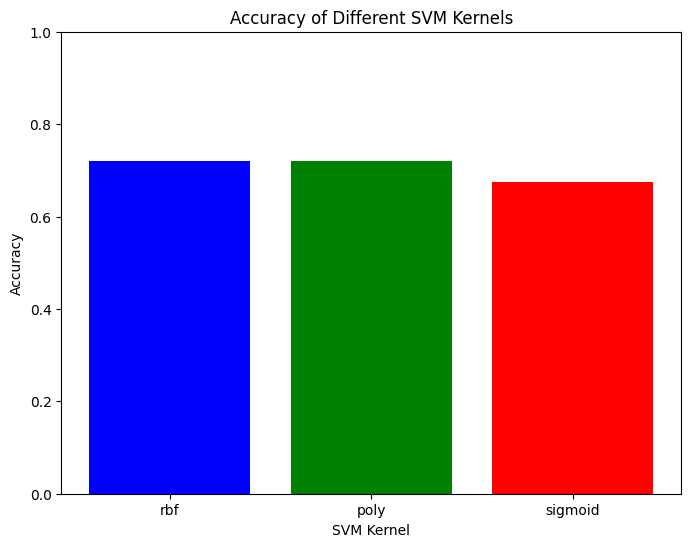

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt # Import matplotlib here as well for clarity

# Load dataset
df = pd.read_csv("glass.csv")

# Drop ID column
X = df.drop(columns=["Id", "Type"])
y = df["Type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kernels and their hyperparameters
kernel_params = {
    'rbf': {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    },
    'poly': {
        'kernel': ['poly'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1],
        'degree': [2, 3, 4]
    },
    'sigmoid': {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    }
}

# Initialize a dictionary to store accuracies
accuracies = {}

# Function to train and evaluate SVM with GridSearchCV
def evaluate_kernel(kernel_name, param_grid):
    print(f"\nEvaluating {kernel_name.upper()} kernel")
    grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculate and store the accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel_name] = acc

    print("Best Parameters:", grid.best_params_)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Run evaluation for each kernel
for kernel, params in kernel_params.items():
    evaluate_kernel(kernel, params)

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel("SVM Kernel")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different SVM Kernels")
plt.ylim(0, 1) # Set y-axis limits to represent accuracy percentage
plt.show() # Display the plot

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

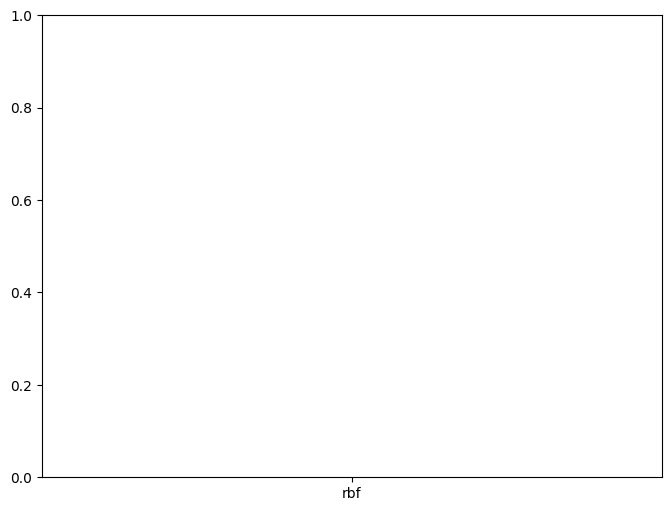